# Instalação `OpenBTS`
Instalação e configuração de um transceiver GSM utilizando OpenBTS.

## 1. Abrir terminal. Pressione as teclas:
Obs: Repetir procedimento para cada novo terminal.

In [ ]:
CRTL+ALT+t

## 2. O projeto OpenBTS utiliza vários novos recursos no Git. Para certificar-se de que seu cliente é compatível (por exemplo, mais recente que 1.8.2). Digite no terminal: 
Desconsiderar procedimento caso o Git já esteja instalado. É ncessário que você instale uma versão do Git superior a versão 1.8.2. Digite no terminal:

In [ ]:
$ sudo apt-get install software-properties-common python-software-properties
$ sudo add-apt-repository ppa:git-core/ppa
(press enter to continue)
$ sudo apt-get update
$ sudo apt-get install git

## 3. Verificar a versão do Git. Digite no terminal:

In [ ]:
$ git --version
git version x.x.x

## 4. Criar pasta de instalação do OpenBTS. Digite no terminal:

In [ ]:
$ mkdir openBTS
$ cd openBTS/ 

## 5. Baixar a última versão do openBTS via Git. Digite no terminal: 

In [ ]:
$ git clone https://github.com/RangeNetworks/dev.git

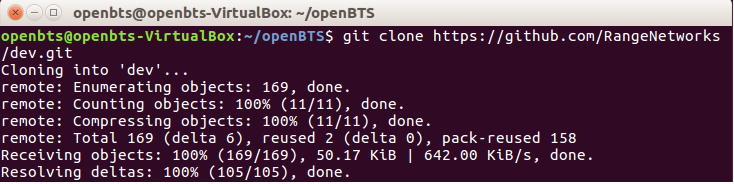

## 6. Instalar os componentes (asterisk, asterisk-config, CommonLibs, NodeManager, SR, subscriberRegistry e system-config). Digite no terminal:

In [ ]:
$ cd dev
$ ./clone.sh

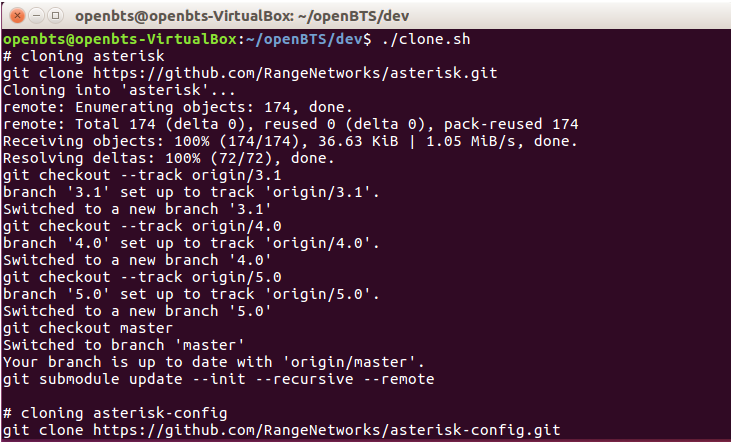

## 7. Antes de compilar você deve escolher um branch usando switchto.sh. Digite no terminal:

Para a esse experimento foi utilizado o master que indica a última versão de desenvolvimento.

In [ ]:
$ ./switchto.sh master
(or)
$ ./switchto.sh 4.0
(or)
$ ./switchto.sh v4.0.0

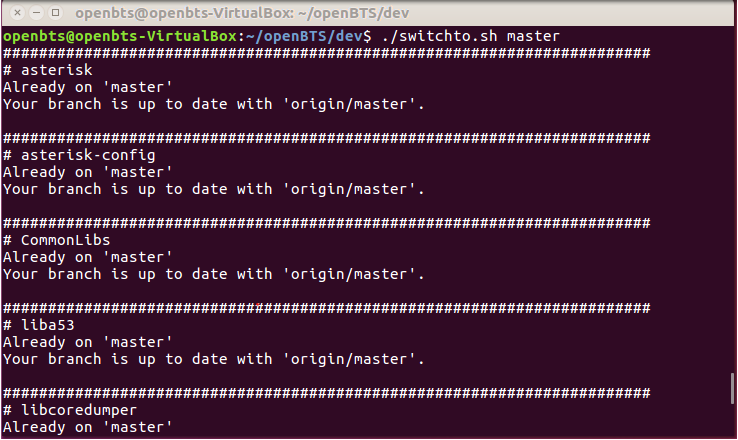

## 8. O script build.sh instalará automaticamente todas as dependências de compilação e construirá um pacote de instalação para cada componente. Digite no terminal:
Depois que as dependências são resolvidas, cada componente é compilado em um pacote instalável.

In [ ]:
$ ./build.sh N210

O rádio disponível em laboratório é o N210.
Os pacotes compilados estão agora em um novo diretório chamado BUILDS/data-horas.

É possível que você receba uma mensagem indicando dependências, digite a senha de
administrador e pressione ENTER para continuar. Agora pode ir tomar uma água, pois esse
processo vai demorar!

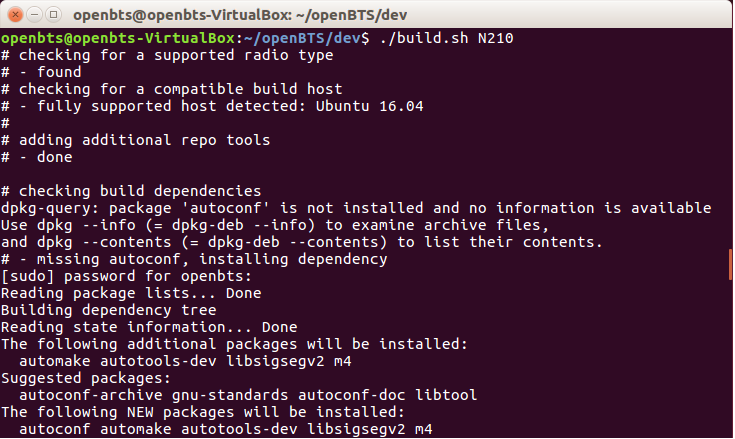

## 9. Use o dpkg para instalar os novos pacotes (isso irá reclamar das dependências). Digite no terminal (por exemplo):

In [ ]:
$ sudo dpkg -i BUILDS/2022-08-29--16-20-43/*.deb

Digite Y se for perguntado se você quer realmente instalar os pacotes.

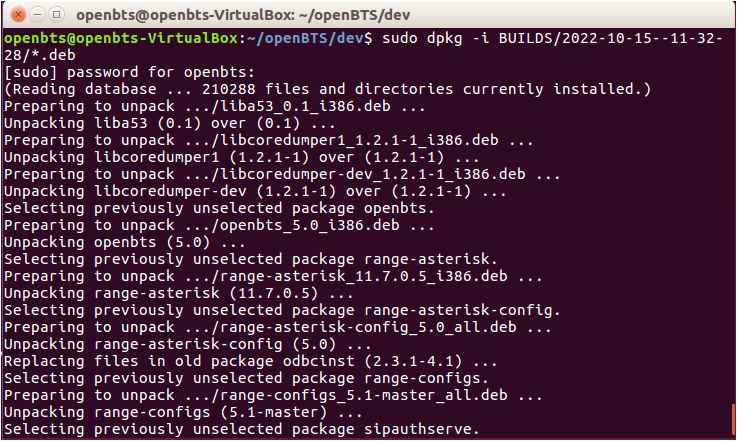

## 10. Para que o Aptitude resolva as dependências. Digite no terminal:

In [ ]:
$ sudo apt-get -f install

Digite Y se for perguntado se você quer realmente instalar os pacotes.

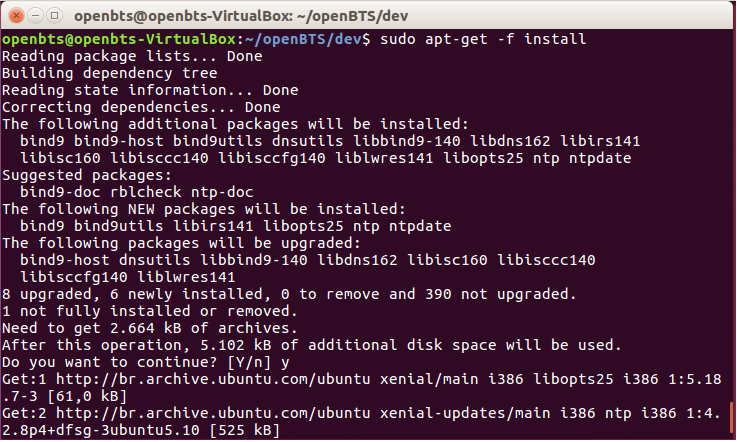

## 11. Inserir mais uma vez o comando do passo 10.

In [ ]:
$ sudo dpkg -i BUILDS/2022-08-29--16-20-43/*.deb

#### Esses procedimentos seguem os passos fornecidos pela [Range Networks](https://github.com/RangeNetworks/dev/wiki). 

## 12. Você precisa criar um link simbólico para o arquivo executável transceiver52M. Digite no terminal:

In [ ]:
$ cd openbts/apps/
$ ln -s ../Transceiver52M/transceiver .

Para testar se o link foi criado, digite:

In [ ]:
$ ls –lah

Você verá a seguinte tela (o link aparecerá em azul no final):

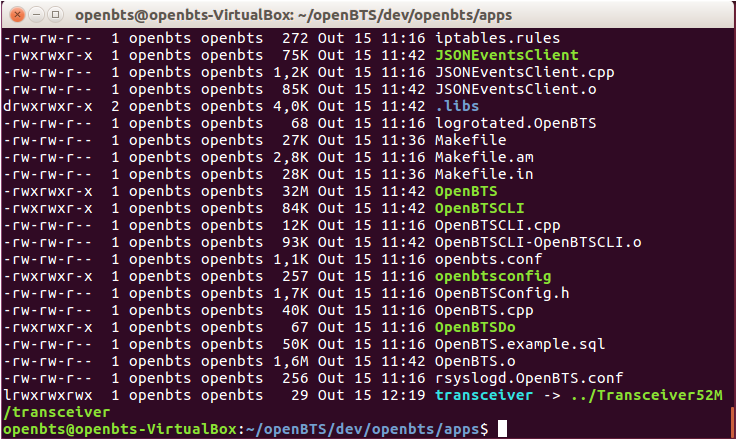

## 13. Verificando a configuração do OpenBTS. Procure se o seguinte arquivo existe: /etc/OpenBTS/OpenBTS.db
Ele é um banco de dados que guarda todas as configurações do OpenBTS. Ele precisa ser criado na pasta “/etc/OpenBTS”. Para verificar se o arquivo existe, digite no terminal:

In [ ]:
$ ls /etc/OpenBTS/OpenBTS.db
$ sudo sqlite3 -init ./apps/OpenBTS.example.sql /etc/OpenBTS/OpenBTS.db ".quit"

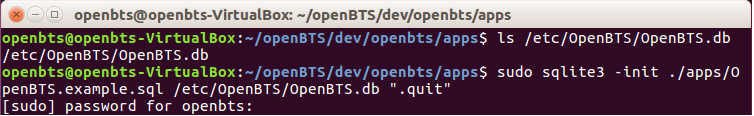

Você ainda pode testar se o arquivo com o seguinte comando:

In [ ]:
$ sudo sqlite3 /etc/OpenBTS/OpenBTS.db .dump

Se você visualizar uma série de variáveis de configuração, o banco de dados está instalado corretamente.

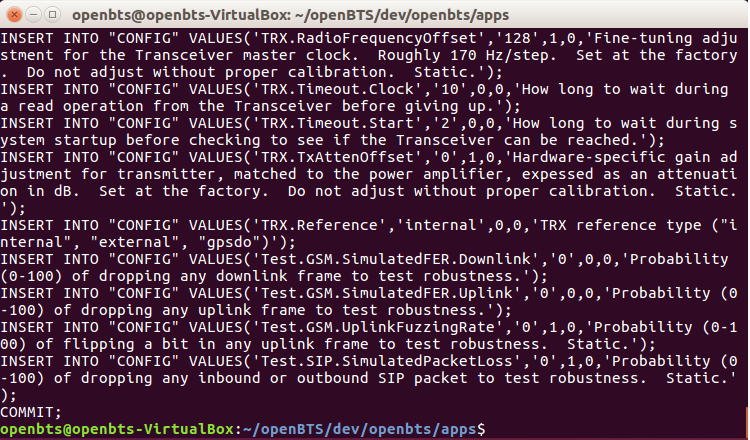

Se o arquivo não existir, digite a sequencia de comandos abaixo para criá-lo:

In [ ]:
$ sudo mkdir /etc/OpenBTS
$ sudo sqlite3 -init ./OpenBTS.example.sql /etc/OpenBTS/OpenBTS.db ".quit"

## 14. Configurar segundo adaptador na máquina virtual

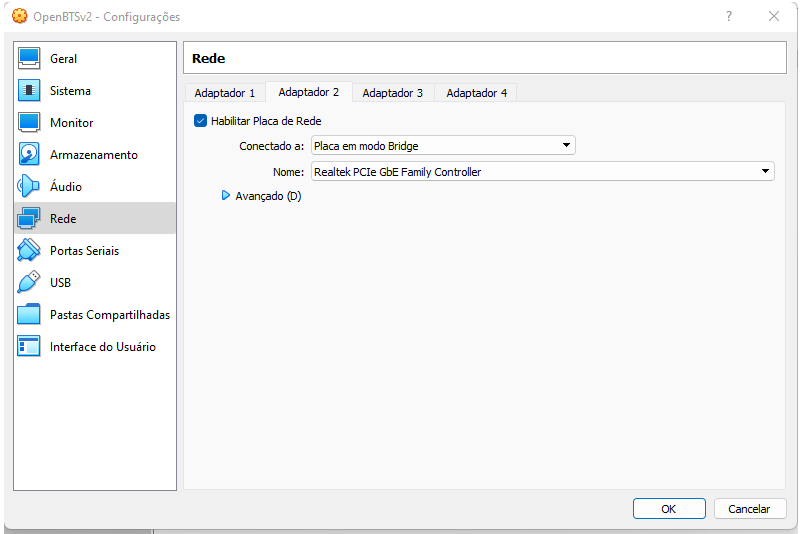

Inserir IP fixo no segundo adaptador, 192.168.10.1/24.

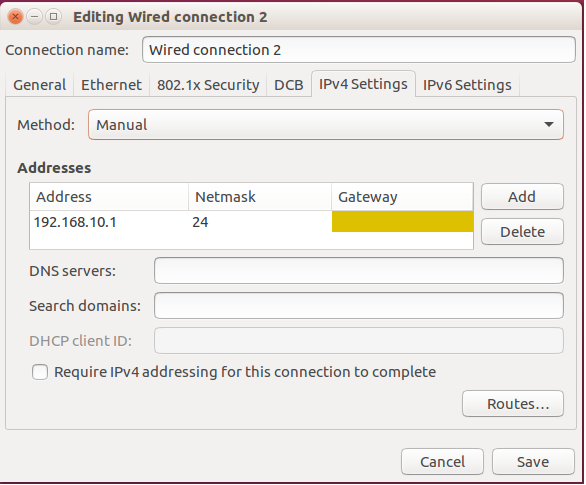

## 15. Rodar openBTS

Certifique a comunicação com o hardware. Plug a USRP no computador, abra outro terminal (crtl+alt+t) e digite:

In [ ]:
$ uhd_find_devices

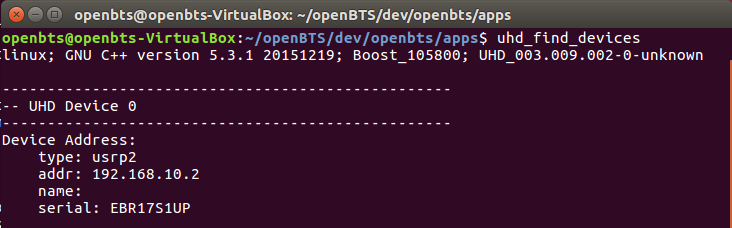

In [ ]:
$ uhd_usrp_probe

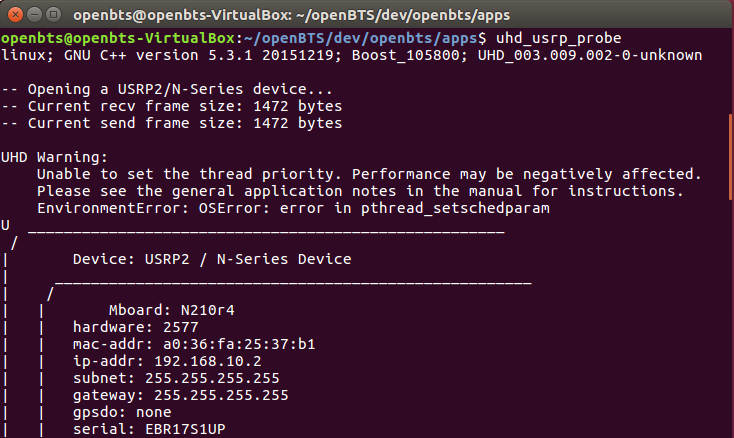

Antes de abrir o openBTS é importante verificar algumas mensagens de Alerta (warnings).

Se necessário atualização do firmware.

In [ ]:
$ sudo su
/usr/lib/uhd/utils/uhd_images_downloader.py
/sudo /usr/bin/uhd_image_loader --args="type=usrp2, addr=192.168.1.2"

Se relacionadas com a memória alocada para a USRP. Duas mensagens em especial, sugere para que dois buffers sejam modificados. Digite em um terminal:

In [ ]:
$ sudo sysctl -w net.core.rmem_max=50000000
$ sudo sysctl -w net.core.wmem_max=1048576

Se você vir a seguinte mensagem de alerta, tudo deu certo.

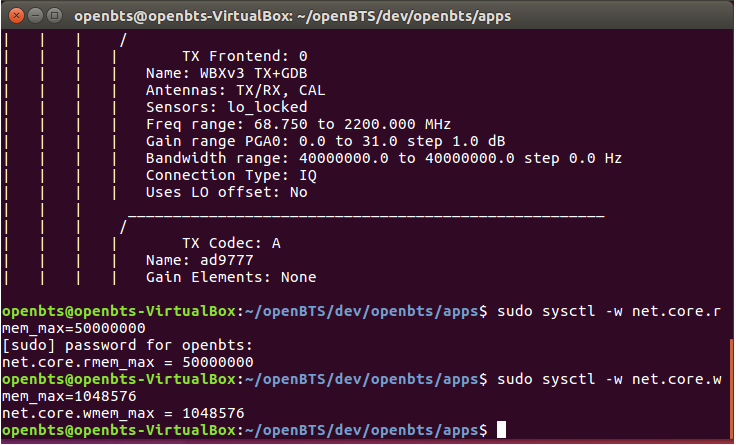

Agora, para iniciar o OpenBTS, digite:

In [ ]:
$ sudo ./OpenBTS

A seguir, CLI do OpenBTS:

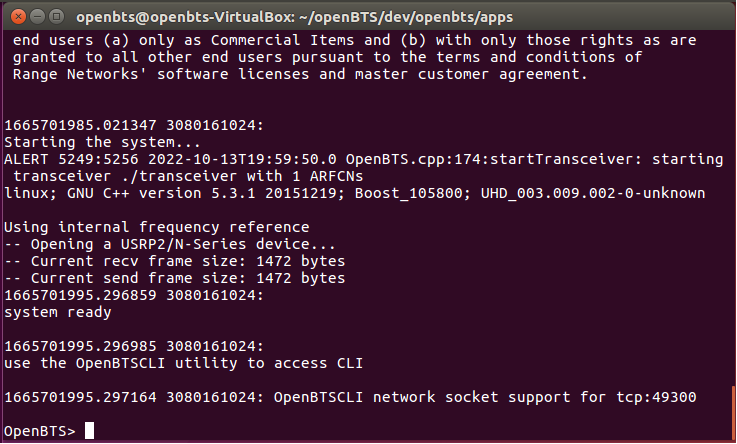

# Configuração `OpenBTS`

Em algumas versões do OpenBTS o openBTSCLI já é aberto automaticamente. Se não for, ele deve ser aberto para configurar algumas variáveis.

## 1. Abra outro terminal (crtl+alt+t) e digite:

In [ ]:
$ sudo ./OpenBTSCLI

Você verá:

In [ ]:
$ OpenBTS>

## 2. Para ver as configurações correntes. Digite no terminal:

OpenBTS> config

Você verá uma lista de configuração de sua BTS GSM.

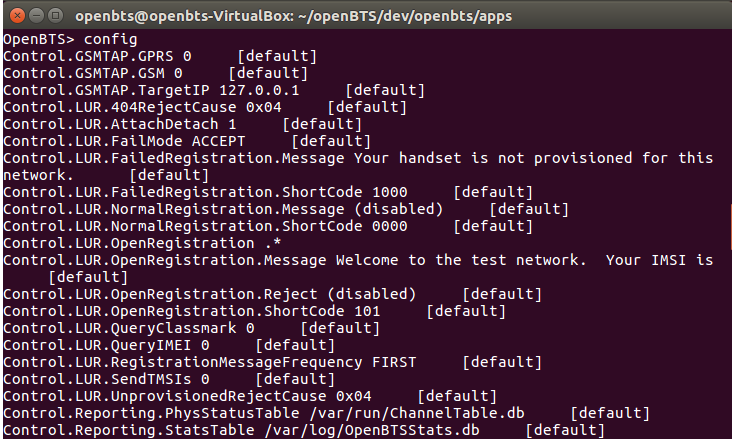

## 3. Agora verifique se as seguintes configurações estão corretas:

### 3.1. GSM.Radio.Band - Define banda GSM apropriada para o hardware. Para visualizar configuração default, digite no terminal:

In [ ]:
$ OpenBTS> config GSM.Radio.Band

Se não tiver em 900, mude digitando:

In [ ]:
$ OpenBTS> config GSM.Radio.Band 900

### 3.2. GSM.Radio.C0 - Define ARFCN apropriado para banda. Para visualizar configuração default, digite no terminal:

In [ ]:
$ OpenBTS> config GSM.Radio.C0

Se não tiver em 51, mude digitando:

OpenBTS> config GSM.Radio.C0 51

### 3.3. Control.LUR.OpenRegistration - Define que OpenBTS não deve rejeitar seu aparelho apenas porque seu servidor de registro não está respondendo. Digite no terminal:

In [ ]:
$ OpenBTS> config Control.LUR.OpenRegistration .*

### 3.4. GSM.Radio.RxGain - Configuração de ganho do receptor em dB. Digite no terminal:

O valor ideal é determinado pelo hardware é 47 dB para RAD1 e 0-10 dB para hardware Ettus. Este parâmetro do banco de dados é estático, mas o ganho do receptor pode ser modificado em tempo real com o comando CLI "rxgain".

Fonte: Getting Started with OpenBTS: Build Open Source Mobile Networks, p.39, 2015.

In [ ]:
OpenBTS> devconfig GSM.Radio.RxGain 2

### 3.5. Control.LUR.OpenRegistration – Define o nome da rede. Digite no terminal:

In [ ]:
OpenBTS> config GSM.Identity.ShortName GppComNet

### 3.6. Outros commando úteis:

In [ ]:
OpenBTS> help (Ver todos os commandos disponíveis)
OpenBTS> audit (Para determinar se algo precisa ser ajustado)

E quiser sair (não saia!), digite (crtl+c) para sair do OpenBTSCLI.

# Configuração do  `Dispositivo Móvel `

Agora é possível procurar a rede no celular e se registrar. Você verá uma rede chamada “00101”, “01” ou “Test PLMN 1-1”. Ao se conectar, receberá uma SMS informando seu número IMSI. Guarde esse SMS que é muito importante.

## 1. Buscar rede manualmente e se registrar

O menu de cada aparelho é diferente, mas o item geralmente é semelhante a "Seleção de operadora" ou "Seleção de rede".

Passos para busca manual em Android:

1. Inicie o aplicativo “Configurações” no sistema de menus do Android.
2. Selecione “Mais”.
3. Selecione “Redes móveis”.
4. Selecione “Operadores de rede”. Isso pode ou não iniciar uma pesquisa. Se não, selecione “Redes de pesquisa.”
5. Uma vez finalizada a busca, é apresentada uma lista de redes de operadoras disponíveis.

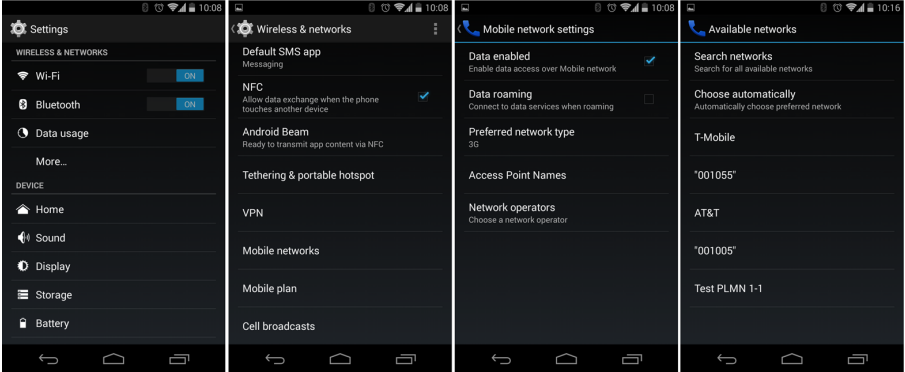

<center>Getting Started with OpenBTS: Build Open Source Mobile Networks, 2015.</center>

Passos para busca manual em iOS:

1. Na tela inicial, abra o aplicativo “Configurações”.
2. Selecione “Transportadora”.
3. Na tela “Seleção de Rede”, desative a seleção automática de operadora.
4. O aparelho irá agora procurar redes de operadoras disponíveis.
5. Uma vez finalizada a busca, é apresentada uma lista de redes de operadoras disponíveis.

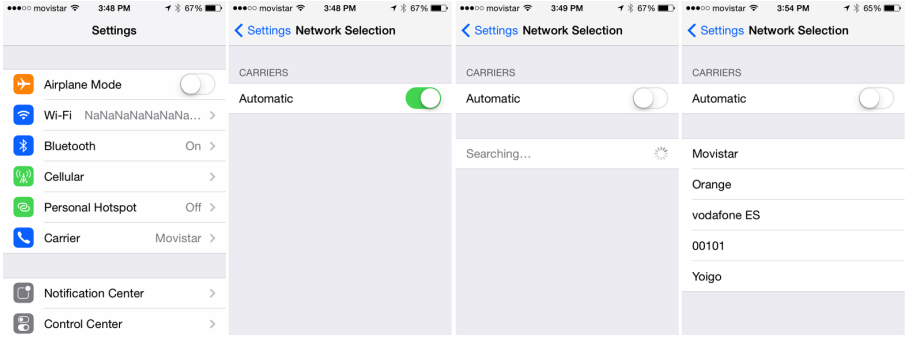

<center>Fonte: Getting Started with OpenBTS: Build Open Source Mobile Networks, 2015.</center>

Você verá uma rede chamada de “00101”, “01” ou “Test PLMN 1-1”.

## 2. Após a conexão estabelecida o dispositivo receberá um SMS informando seu IMSI.

Também é possível consultar os dispositivos conectados na rede através da CLI do OpenBTS, digitando:

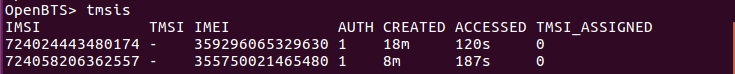

# Inicializando o `Subscriber Registry e Sipauthserve`

O openBTS depende da instalação de um servidor de autenticação SIP (Sipauthserver) para registro de tráfego e de um Subscriber Registry para resgistro de usuários. Sem eles o sistema não funcionará.

## 1. Localizando banco de dados

Para configurar um cliente, precisamos de um banco de dados, que, por padrão, é localizado em /var/lib/asterisk/sqlite3dir.  Abra um novo terminal (crtl+alt+t) e digite:

In [ ]:
$ ls /var/lib/asterisk/sqlite3dir

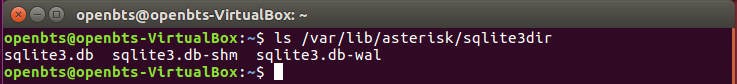

Se a pasta não existir, pode criá-la com o seguinte comando:

In [ ]:
$ sudo mkdir -p /var/lib/asterisk/sqlite3dir

## 2. Subscriber Registry

### 2.1. NodeManager

Iniciar interface de controle comum entre OpenBTS, SMQueue e SIPAuthServe usada para configuração e monitoramento do sistema. Abra um novo terminal (crtl+alt+t) e digite:

In [ ]:
$ cd openBTS/dev/NodeManager/
$ sudo ./nmcli.py

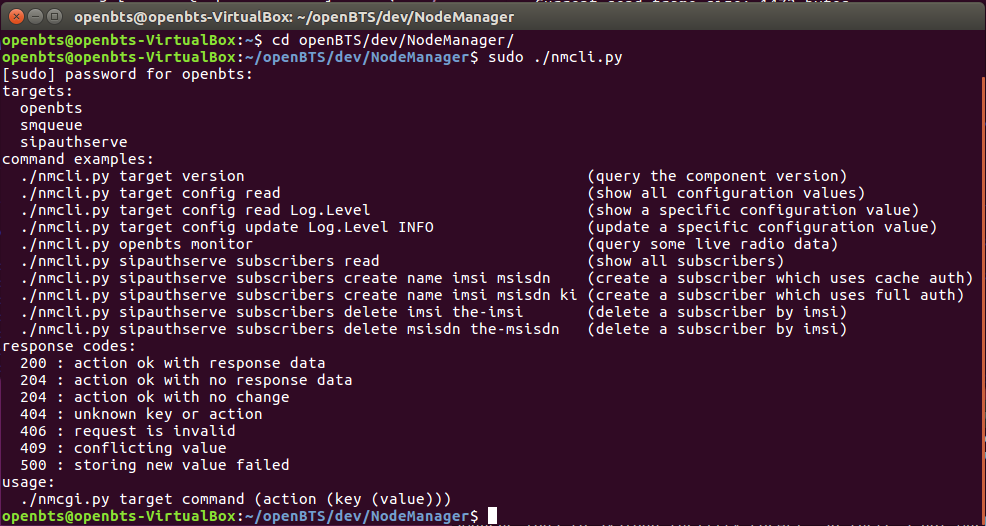

### 2.2. nmcli.py

nmcli.py é o programa usado para adicionar assinantes. O comando abaixo é usado para inserir novo assinante no banco de dados, digite no terminal:

In [ ]:
$ ./nmcli.py sipauthserve subscribers create name imsi msisdn

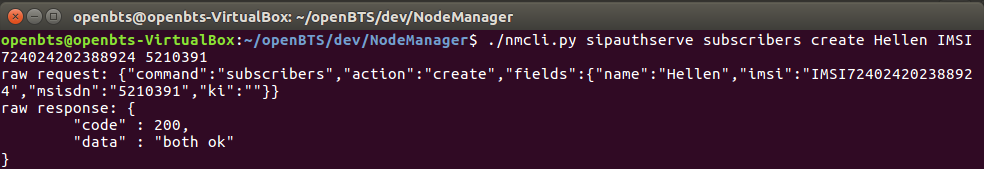

O comando abaixo exibe todos os assinantes cadastrados na rede, digite no terminal:

In [ ]:
$ ./nmcli.py sipauthserve read

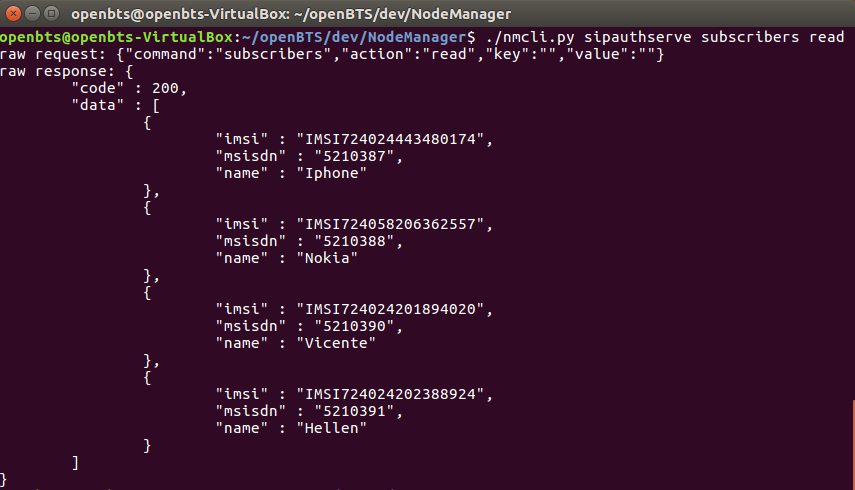

## 2.3. Visualização do banco de bados

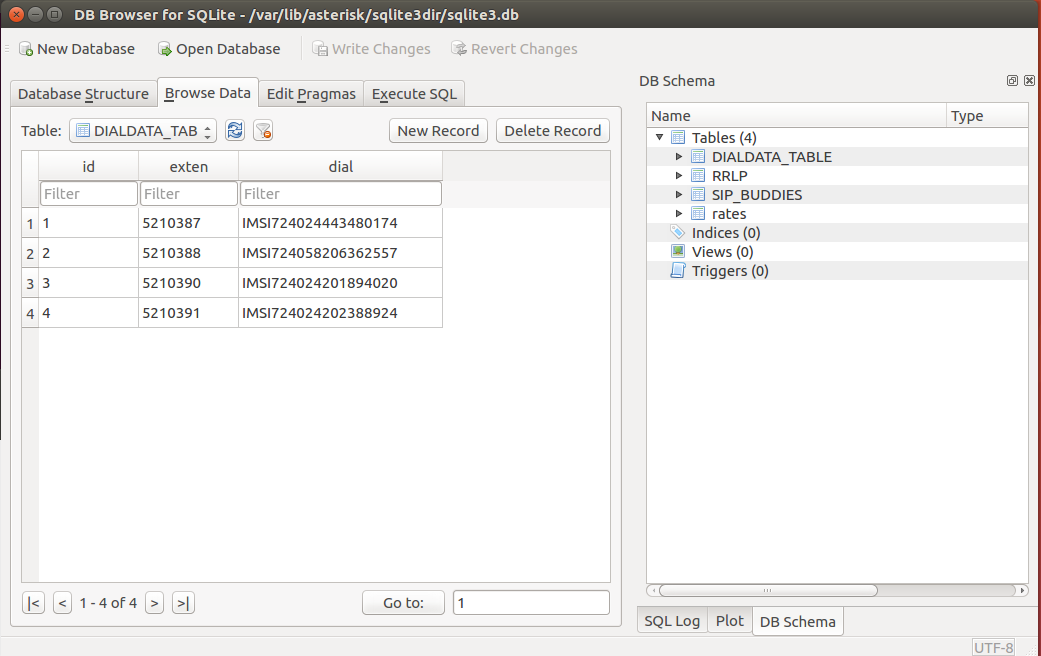

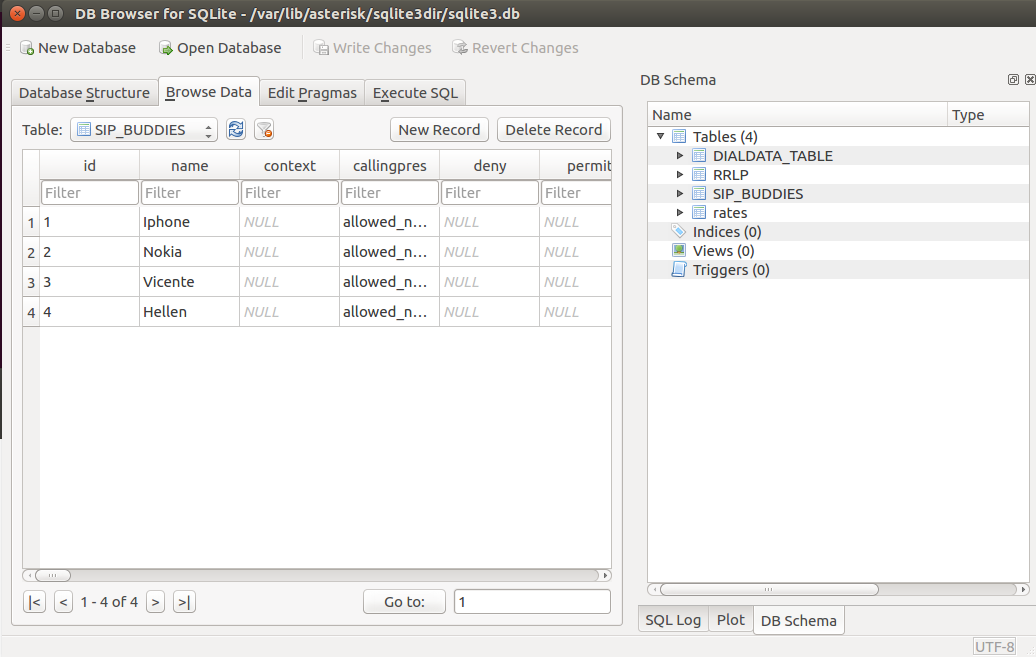

## 3. Servidor de autenticação SIP (SIPAuthServe)

O SIPAuthServe é o aplicativo responsável por processar solicitações SIP REGISTER, substitui o registro SIP Asterisk e o GSM Home Location Register (HLR) encontrado em uma rede GSM convencional.

Quando um dispositivo tentar ingressar na rede móvel uma requisição é disparada, quando esse dispositivo é autenticado o SIPAuthServe é responsável por atualizar o banco de dados do Subscriber Registry com o endereço IP da instância do OpenBTS que o iniciou, permitindo que outros assinantes liguem para o aparelho.

Verifique se o banco de dados sipauthserve.db já está no local correto. Abra um novo terminal (crtl+alt+t) e digite:

In [ ]:
$ ls /etc/OpenBTS/

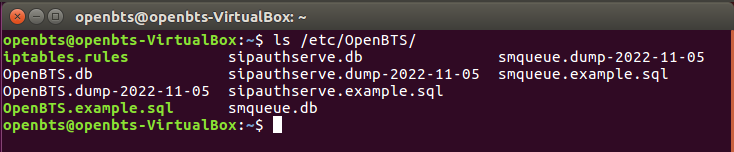

Se você vir o arquivo na pasta, execute o servidor de autenticação. Abra um novo terminal (crtl+alt+t) e digite:

In [ ]:
$ cd /OpenBTS/
$ sudo ./sipauthserve

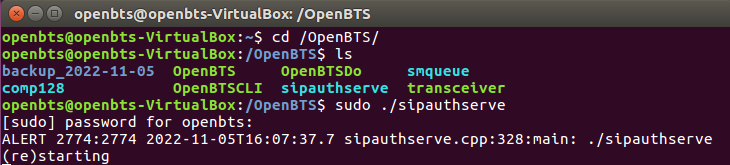

Se o arquivo do banco de dados (sipauthserve.db) não estiver na pasta /etc/OpenBTS, digite o seguinte comando para criá-lo:

In [ ]:
$ sudo sqlite3 -init ../../subscriberRegistry/apps/subscriberRegistry.example.sql /etc/OpenBTS/sipauthserve.db ".quit"

# `Asterisk`

O aplicativo Asterisk torna possível o serviço de voz. Abra um novo terminal (crtl+alt+t) e digite:

In [ ]:
$ sudo asterisk –r

Você verá a seguinte tela: 

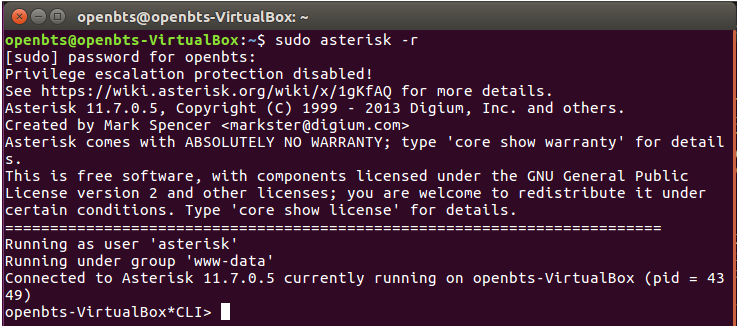

Se você encontrar problema, tente:

In [ ]:
$ sudo asterisk –C

ou

$ asterisk -vvvvvvc

Caso ocorra problema com a atualização do banco de dados do Subscriber Registry, a solução é configurar o componente Asterisk para permitir o registro de números de celulares através do IMSI.

## 1. Você precisa editar dois arquivos de configuração do ASTERISK (extensions-range-test.conf e sip-custom-contexts.conf). Abra um novo terminal (crtl+alt+t) e digite:

O programa GEDIT abrirá no modo de edição dos seguintes arquivos:

* sip-custom-contexts.conf→ Para configurar seu “canal” para todas as conexões SIP e a maneira de autenticação dos usuários.

* extensions-range-test.conf→ Para definir o plano de ligações (dialplan), as extensões e o fluxo de chamada uma vez que é estabelecido um “canal”.

In [ ]:
$ sudo gedit /etc/asterisk/sip-custom-contexts.conf & sudo gedit /etc/asterisk/extensions-range-test.conf &

## 2. Edição dos arquivos

### 2.1. sip-custom-contexts.conf

No arquivo sip-custom-contexts.conf para cada dispositivo inserir o trecho abaixo, alterando as informações de IMSI e callerid.

Obs: O símbolo ; significa comentário. Tudo que for digitado na linha iniciada com ; será descartado na execução do Asterisk.

In [ ]:
; Para cada celular (com seu IMSI correspondente), insira:
; Celular 01 Iphone
[IMSI724024443480174]
callerid=5210387; esse é o número do telefone na rede
canreinvite=no
type=friend
context=sip-external ; esse é o contexto do arquivo extensions.conf
allow=gsm
host=dynamic
dtmfmode=info

### 2.2.	extensions-range-test.conf

No arquivo extensions-range-test.conf foram criadas as extensões stdexten, demo, macro-dialGSM e sip-external.

Para cada dispositivo inserir o trecho abaixo no sip-external, alterando apenas as informações de IMSI e callerid.

* exten => **5210387**,1,Macro(dialGSM,**IMSI724024443480174**@127.0.0.1:5062)

In [ ]:
[stdexten]
;
; Standard extension subroutine:
;   ${EXTEN} - Extension
;   ${ARG1} - Device(s) to ring
;   ${ARG2} - Optional context in Voicemail
;
; Note that the current version will drop through to the next priority in the
; case of their pressing '#'.  This gives more flexibility in what do to next:
; you can prompt for a new extension, or drop the call, or send them to a
; general delivery mailbox, or...
;
; The use of the LOCAL() function is purely for convenience.  Any variable
; initially declared as LOCAL() will disappear when the innermost Gosub context
; in which it was declared returns.  Note also that you can declare a LOCAL()
; variable on top of an existing variable, and its value will revert to its
; previous value (before being declared as LOCAL()) upon Return.
;
exten => _X.,50000(stdexten),NoOp(Start stdexten)
exten => _X.,n,Set(LOCAL(ext)=${EXTEN})
exten => _X.,n,Set(LOCAL(dev)=${ARG1})
exten => _X.,n,Set(LOCAL(cntx)=${ARG2})
exten => _X.,n,Set(LOCAL(mbx)=${ext}${IF($[!${ISNULL(${cntx})}]?@${cntx})})
exten => _X.,n,Dial(${dev},20)				; Ring the interface, 20 seconds maximum
exten => _X.,n,Goto(stdexten-${DIALSTATUS},1)		; Jump based on status (NOANSWER,BUSY,CHANUNAVAIL,CONGESTION,ANSWER)

exten => stdexten-NOANSWER,1,Voicemail(${mbx},u)	; If unavailable, send to voicemail w/ unavail announce
exten => stdexten-NOANSWER,n,Return()			; If they press #, return to start

exten => stdexten-BUSY,1,Voicemail(${mbx},b)		; If busy, send to voicemail w/ busy announce
exten => stdexten-BUSY,n,Return()			; If they press #, return to start

exten => _stde[x]te[n]-.,1,Goto(stdexten-NOANSWER,1)	; Treat anything else as no answer

exten => a,1,VoicemailMain(${mbx})			; If they press *, send the user into VoicemailMain
exten => a,n,Return()

[demo]
include => stdexten
;
; We start with what to do when a call first comes in.
;
exten => s,1,Wait(1)			; Wait a second, just for fun
exten => s,n,Answer			; Answer the line
exten => s,n,Set(TIMEOUT(digit)=5)	; Set Digit Timeout to 5 seconds
exten => s,n,Set(TIMEOUT(response)=10)	; Set Response Timeout to 10 seconds
exten => s,n(restart),BackGround(demo-congrats)	; Play a congratulatory message
exten => s,n(instruct),BackGround(demo-instruct)	; Play some instructions
exten => s,n,WaitExten			; Wait for an extension to be dialed.

exten => 2,1,BackGround(demo-moreinfo)	; Give some more information.
exten => 2,n,Goto(s,instruct)

exten => 3,1,Set(LANGUAGE()=fr)		; Set language to french
exten => 3,n,Goto(s,restart)		; Start with the congratulations

exten => 1000,1,Goto(default,s,1)
;
; We also create an example user, 1234, who is on the console and has
; voicemail, etc.
;
exten => 1234,1,Playback(transfer,skip)		; "Please hold while..."
					; (but skip if channel is not up)
exten => 1234,n,Gosub(${EXTEN},stdexten(${GLOBAL(CONSOLE)}))
exten => 1234,n,Goto(default,s,1)		; exited Voicemail

exten => 1235,1,Voicemail(1234,u)		; Right to voicemail

exten => 1236,1,Dial(Console/dsp)		; Ring forever
exten => 1236,n,Voicemail(1234,b)		; Unless busy

;
; # for when they're done with the demo
;
exten => #,1,Playback(demo-thanks)	; "Thanks for trying the demo"
exten => #,n,Hangup			; Hang them up.

;
; A timeout and "invalid extension rule"
;
exten => t,1,Goto(#,1)			; If they take too long, give up
exten => i,1,Playback(invalid)		; "That's not valid, try again"

;
; Create an extension, 500, for dialing the
; Asterisk demo.
;
exten => 500,1,Playback(demo-abouttotry); Let them know what's going on
exten => 500,n,Dial(IAX2/guest@pbx.digium.com/s@default)	; Call the Asterisk demo
exten => 500,n,Playback(demo-nogo)	; Couldn't connect to the demo site
exten => 500,n,Goto(s,6)		; Return to the start over message.

;
; Create an extension, 600, for evaluating echo latency.
;
exten => 600,1,Playback(demo-echotest)	; Let them know what's going on
exten => 600,n,Echo			; Do the echo test
exten => 600,n,Playback(demo-echodone)	; Let them know it's over
exten => 600,n,Goto(s,6)		; Start over

;
;	You can use the Macro Page to intercom a individual user
exten => 76245,1,Macro(page,SIP/Grandstream1)
; or if your peernames are the same as extensions
exten => _7XXX,1,Macro(page,SIP/${EXTEN})
;
;
; System Wide Page at extension 7999
;
exten => 7999,1,Set(TIMEOUT(absolute)=60)
exten => 7999,2,Page(Local/Grandstream1@page&Local/Xlite1@page&Local/1234@page/n,d)

; Give voicemail at extension 8500
;
exten => 8500,1,VoicemailMain
exten => 8500,n,Goto(s,6)
;
; Here's what a phone entry would look like (IXJ for example)
;
;exten => 1265,1,Dial(Phone/phone0,15)
;exten => 1265,n,Goto(s,5)

;
;	The page context calls up the page macro that sets variables needed for auto-answer
;	It is in is own context to make calling it from the Page() application as simple as
;	Local/{peername}@page
;

; essa é uma macro (uma série de comandos) muito recomendada na literatura
[macro-dialGSM]
exten => s,1,Dial(SIP/${ARG1},20)
exten => s,2,Goto(s-${DIALSTATUS},1)
exten => s-CANCEL,1,Hangup
exten => s-NOANSWER,1,Hangup
exten => s-BUSY,1,Busy(30)
exten => s-CONGESTION,1,Congestion(30)

; Os nomes entre colchetes são as extensões, elas devem ter o 
; mesmo nome do context no arquivo sip.conf 

[sip-external]
; inserir uma linha dessas para cada celular configurado no arquivo
; sip.conf
; Verifique que o número atribuído no callerid do sip.conf é usado
; aqui
exten => 5210387,1,Macro(dialGSM,IMSI724024443480174@127.0.0.1:5062)

; verificar se o context default (o que tem o número 600, echo test) é
; chamado demo, se sim, incluí-lo aqui
include => demo

## 3. Depois de editar os arquivos, você precisa atualizar o Asterisk. Entrar com os comandos na CLI do Asterisk:

In [ ]:
$ *CLI> sip reload
$ *CLI> dialplan reload

## 4. Permissão de execução do Asterisk (para versões mais atuais)

Pode ocorrer um problema com permissão de execução do Asterisk. Para resolver esse problema é necessario editar o arquivo /etc/asterisk/asterisk.conf e incluir a variável "live_dangerously = Yes" no campo [options]. Abra um novo terminal (crtl+alt+t) e digite:

In [ ]:
$ sudo gedit /etc/asterisk/asterisk.conf

## 5. Carregar módulo Macro

É possível que o módulo Macro não esteja habilitado no menuselect, digite no terminal do Asterisk:

In [ ]:
$ *CLI> module load app_macro.so

### 6. Descompactar arquivos de áudio do Asterisk

Os arquivos de áudio do Asterisk que são utilizados pela extensão demo (no arquivo extensions-range-test.conf) estão compactados. Em um novo terminal (crtl+alt+t) entre com o comando a seguir para localizar a pasta.

In [ ]:
$ cd  /home/openbts/openBTS/dev/asterisk/asterisk-11.7.0/sounds/

Descompactar arquivos de áudio, digite no terminal:

In [ ]:
$ tar xvf asterisk-core-sounds-en-gsm-1.4.24.tar.gz

Mover arquivos para pasta adequada, digite no terminal:

In [ ]:
sudo mv *.gsm /usr/share/asterisk/sounds/

## 8. SMQueue

O aplicativo SMQueue torna possível o serviço de SMS. Para executar, abra outro terminal (crtl+alt+t) e digite:

In [ ]:
$ cd openBTS/dev/smqueue/smqueue
$ sudo ./smqueue

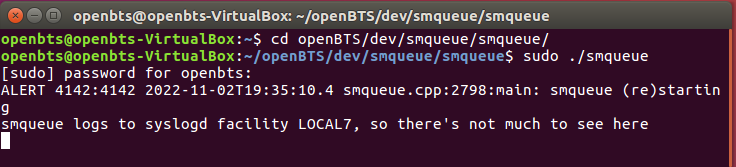

## 9. Testes

### 9.1. Testes SMS

#### 9.1.1. Echo SMS (411)

Ao enviar um SMS para o número 411 ecoará de volta o que for recebido junto com algumas informações adicionais sobre a rede e a conta do assinante que foi usada.

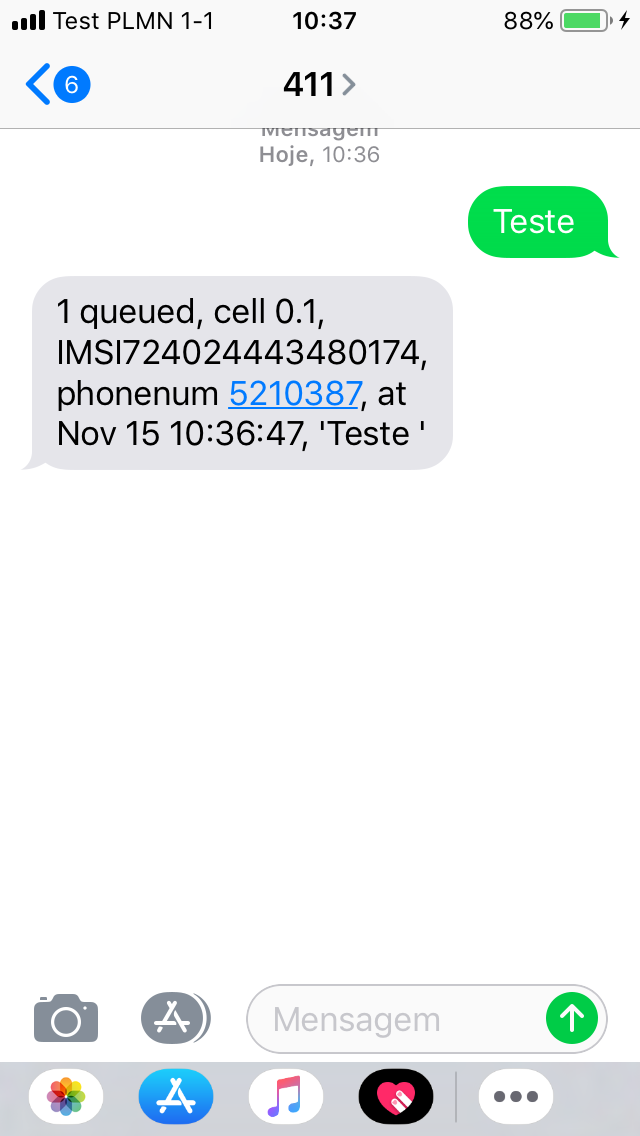


#### 9.1.2. Direct SMS

As mensagens são enviadas diretamente do OpenBTS especificando o IMSI de destino, o número de origem do qual a mensagem deve parecer ter se originado e o próprio corpo da mensagem.

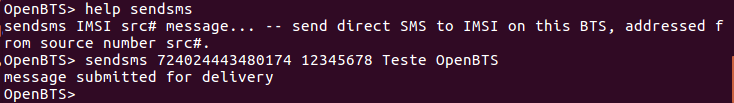

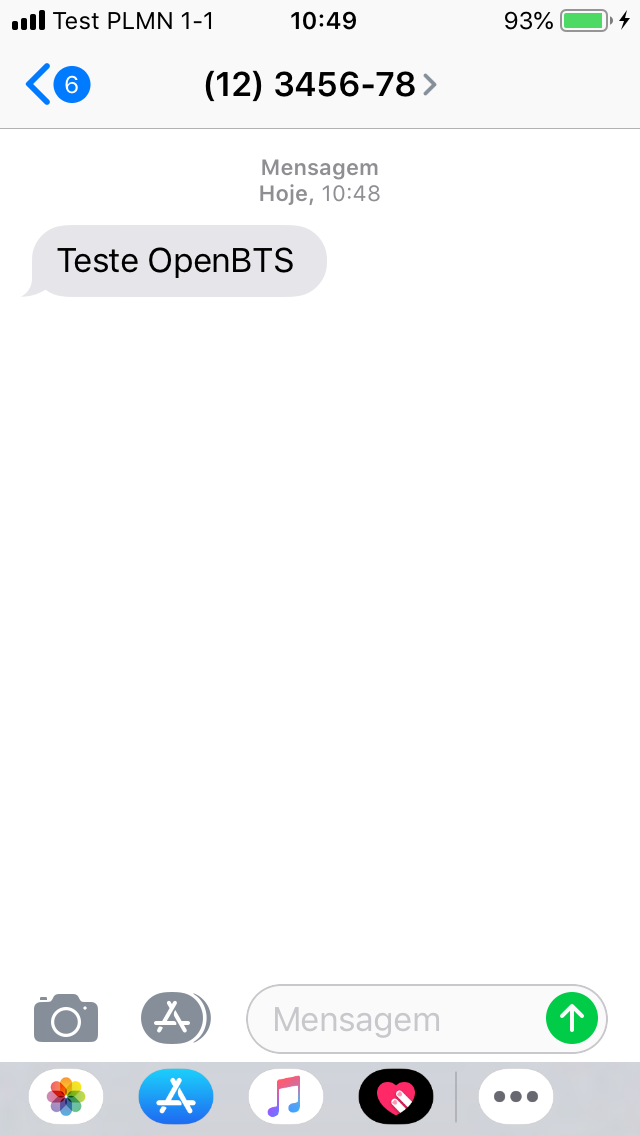

#### 9.1.3. Two-Party SMS

Dois ou mais dispositivos configurados na rede é possível trocar SMS entre eles. 

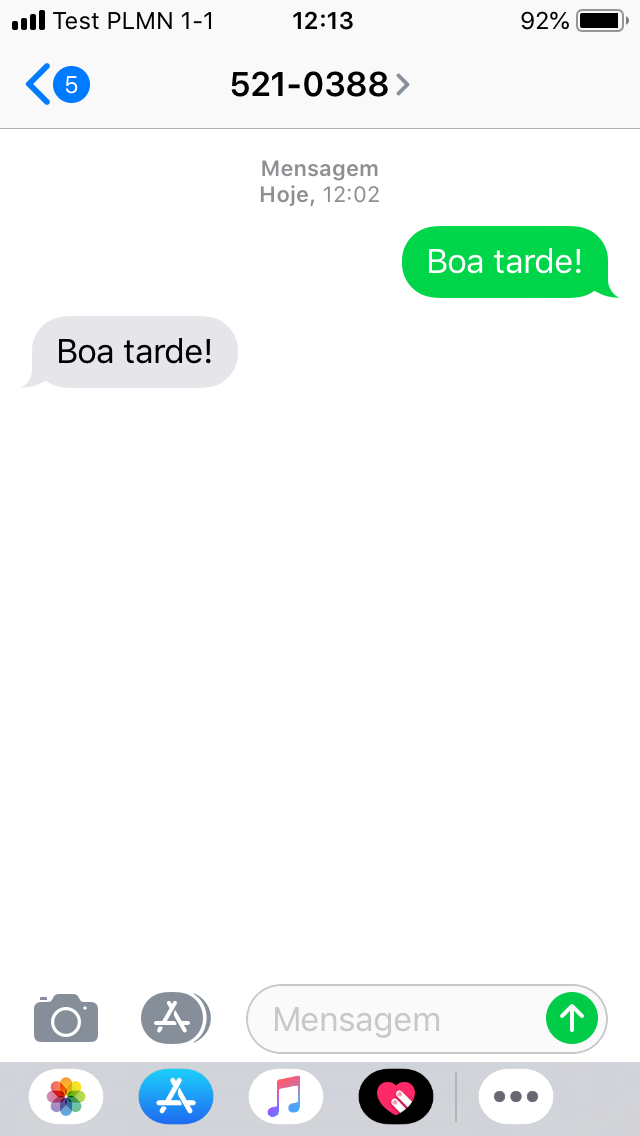

### 9.2. Teste de Voz

#### 9.2.1. Test Tone Call (2602)

Ao discar para o número 2602 a extensão utilizada reproduz um tom constante. 

#### 9.2.2. Echo Call (2600)

Ao discar para o número 2600 a extensão cria uma chamada de eco, que todo o áudio que o Asterisk recebe será ecoado de volta para o remetente.

#### 9.2.3. Demo - Echo Test (600)

Extensão criada no extensions-range-test.conf para avaliar a latência do eco.

#### 9.2.4. Two-Party Call

Dois ou mais dispositivos configurados na rede é possível realizar chamadas entre eles.

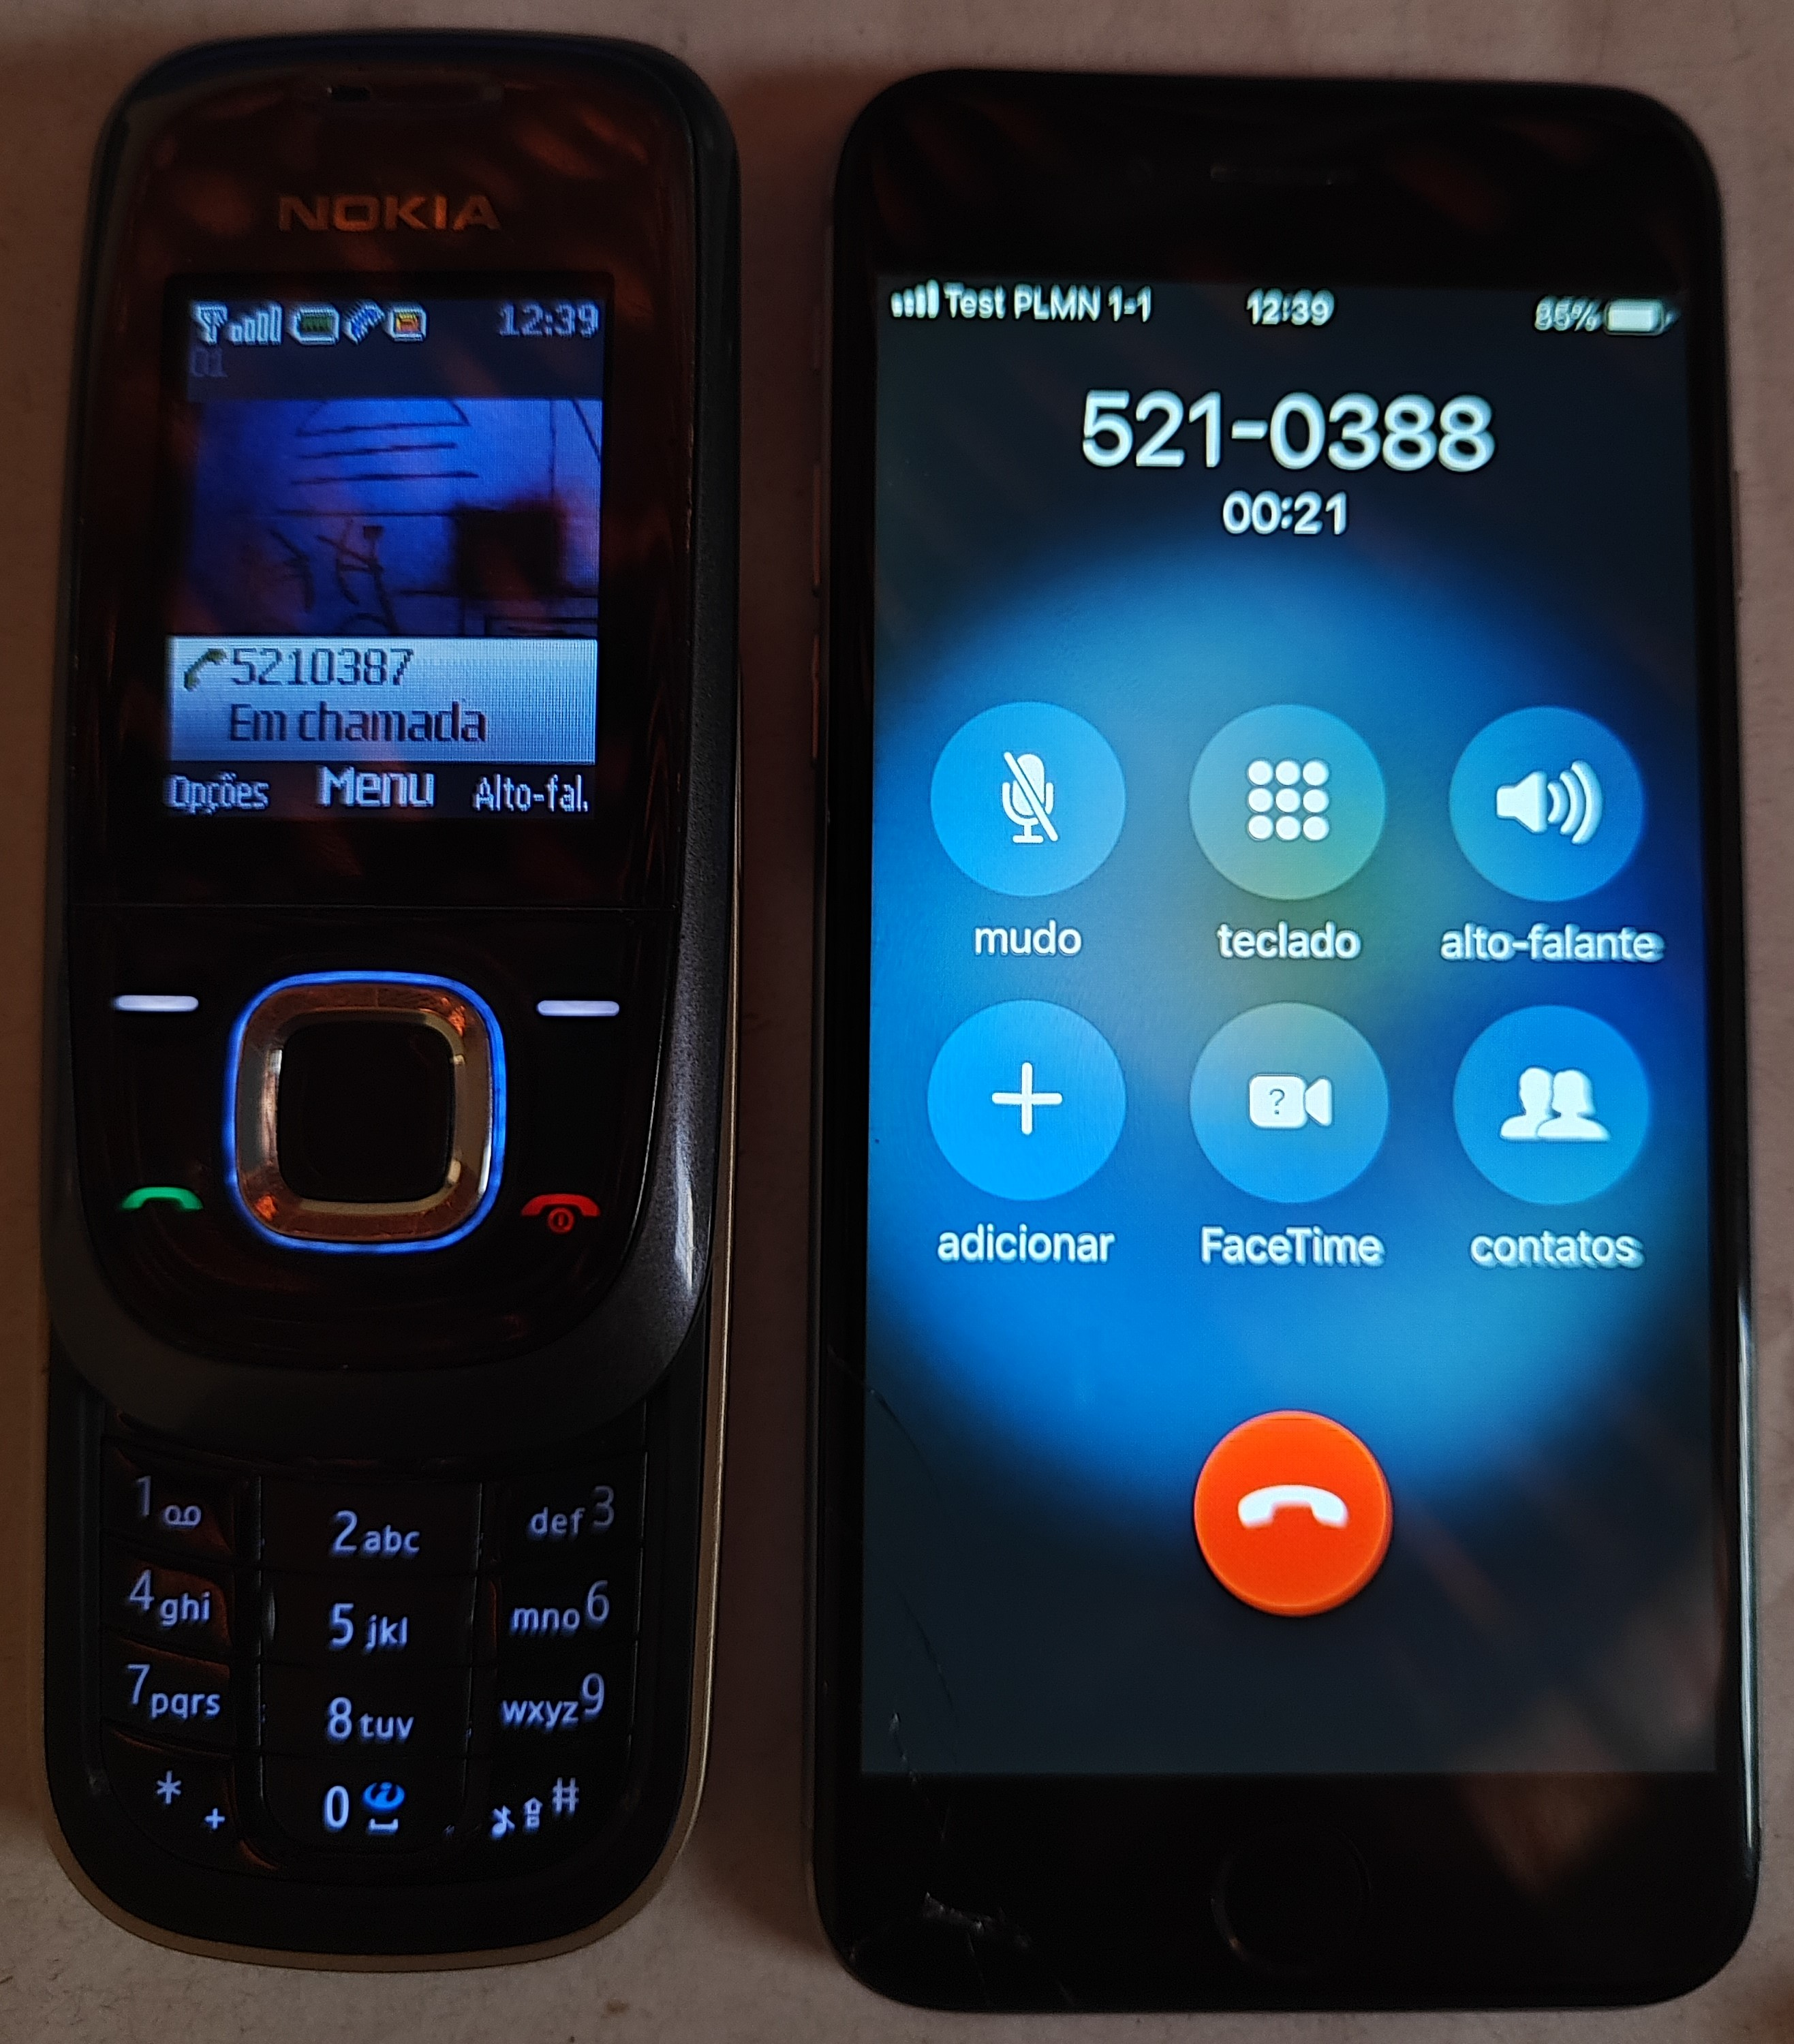